In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
X=pd.read_csv("C:\\Users\\sai\\Desktop\\Dat\\Linear_X_Train.csv")
Y=pd.read_csv("C:\\Users\\sai\\Desktop\\Dat\\Linear_Y_Train.csv")

In [15]:
X.shape
X=X.values
Y=Y.values

In [16]:
Y.shape

(3750, 1)

In [17]:
# normalize
u=X.mean()
std =X.std()
print(u)
print(std)

-0.03779466168006854
0.9920801322508517


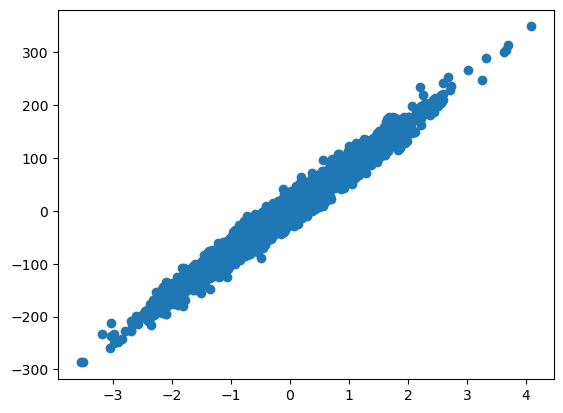

In [18]:
# visulization

plt.scatter(X,Y)
# plt.plot(X,Y)

In [19]:
## Linear Regression

def hypothesis(x,theta):
#     theta = [theta0,theta1]
    y_ = theta[0] + x*theta[1]
    return y_

def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
#         x = X[i]
        y_ = hypothesis(X[i], theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y) * X[i]
    return grad / m

def error(X,Y,theta):
    m=X.shape[0]
    total_error =0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i]) ** 2
    
    return total_error/m

def gradient_descent(X,Y,lr=0.1,max_itr = 100):
    theta=np.zeros((2,))
    error_list = []
    for i in range(max_itr):
        
        grad = gradient(X,Y,theta)
        e =error(X,Y,theta)
        error_list.append(e)
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
        
    return theta,error_list

theta,error_list=gradient_descent(X,Y)


In [20]:
theta

array([ 3.72687896, 80.54086647])

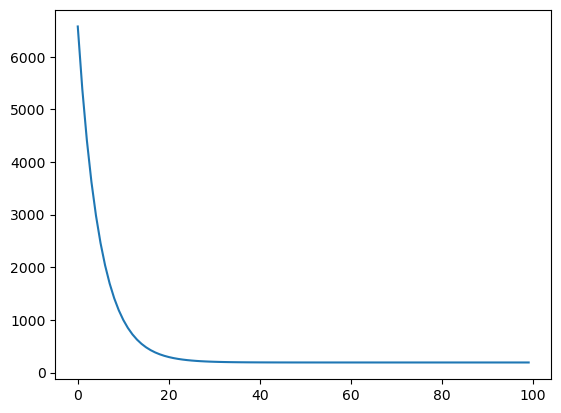

In [23]:
plt.plot(error_list)

In [31]:
y_ =hypothesis(X,theta)

In [32]:
y_

array([[-19.57419108],
       [-43.69635897],
       [ 86.48322254],
       ...,
       [-20.85126634],
       [138.69991375],
       [-35.87967507]])

In [34]:
# preication

y_test = hypothesis(X_test,theta)
y_test

,x
0,-147.524391
1,-66.265705
2,-200.056206
3,226.036217
4,51.326541
...,...
1245,-9.808697
1246,78.808891
1247,14.036740
1248,-18.666509


In [33]:
# R2 score or cofficient of determination
def r2score(Y,y_):
    num = np.sum((Y-y_)**2)
    deno = np.sum((Y-Y.mean())**2)
    
    score=(1-(num/deno))
    
    return score*100
    
r2score(Y,y_)

97.09612220841039